<h1>Make a time-series feature set</h1><br>

In [2]:
import pandas as pd

In [7]:
df_raw = pd.read_csv("../input/FremontBridge.csv", index_col='Date', 
                   parse_dates=True)
df_raw.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [35]:
df_raw.columns = ['west', 'east']
# Only select west column
df_w = df_raw['west']
print(df_w.head())
print(df_w.tail())


Date
2012-10-03 00:00:00    4.0
2012-10-03 01:00:00    4.0
2012-10-03 02:00:00    1.0
2012-10-03 03:00:00    2.0
2012-10-03 04:00:00    6.0
Name: west, dtype: float64
Date
2018-05-31 19:00:00    84.0
2018-05-31 20:00:00    27.0
2018-05-31 21:00:00    36.0
2018-05-31 22:00:00    21.0
2018-05-31 23:00:00    14.0
Name: west, dtype: float64


In [49]:
print(df_w.head(), " ", df_w.head(3).index.weekday) 
print(df_w.tail(), " ", df_w.tail(3).index.weekday)
# Sunday=6, Monday=0, Tue=1, Wed=2, Thr = 3, Fri = 4, Sat = 5

Date
2012-10-03 00:00:00    4.0
2012-10-03 01:00:00    4.0
2012-10-03 02:00:00    1.0
2012-10-03 03:00:00    2.0
2012-10-03 04:00:00    6.0
Name: west, dtype: float64   [2 2 2]
Date
2018-05-31 19:00:00    84.0
2018-05-31 20:00:00    27.0
2018-05-31 21:00:00    36.0
2018-05-31 22:00:00    21.0
2018-05-31 23:00:00    14.0
Name: west, dtype: float64   [3 3 3]


In [50]:
# In order to make a multiple of 7 from Sunday to Saturday
# Get the first weekdays before Sunday and the last part after Saturday
from datetime import date
start_date = date(2012,10,7) # Sunday - 6
end_date = date(2018,5,26) # Sat - 5

In [51]:
# Make a data set of a multiple of 7
df_wk = df_w[df_w.index.date >= start_date]
print(df_wk.head(5), " ", df_wk.head(5).index.weekday)
df_wk = df_wk[df_wk.index.date <= end_date]
print(df_wk.tail(5), " ", df_wk.tail(5).index.weekday)

Date
2012-10-07 00:00:00     6.0
2012-10-07 01:00:00    12.0
2012-10-07 02:00:00     2.0
2012-10-07 03:00:00     4.0
2012-10-07 04:00:00     1.0
Name: west, dtype: float64   [6 6 6 6 6]
Date
2018-05-26 19:00:00    39.0
2018-05-26 20:00:00    21.0
2018-05-26 21:00:00    11.0
2018-05-26 22:00:00    20.0
2018-05-26 23:00:00    13.0
Name: west, dtype: float64   [5 5 5 5 5]


In [56]:
# Get the last index value
end_index = df_wk.shape[0] - 1
print(df_wk.index[0])
print(df_wk.index[end_index])

2012-10-07 00:00:00
2018-05-26 23:00:00


In [59]:
# get a range of start and end
all_times = pd.date_range(df_wk.index[0],df_wk.index[end_index], freq = "H").floor('H')

In [61]:
# fill 0 for the new records
df_all = df_wk.reindex(all_times, fill_value=0)
print(df_all.head())
print(df_all.tail())

2012-10-07 00:00:00     6.0
2012-10-07 01:00:00    12.0
2012-10-07 02:00:00     2.0
2012-10-07 03:00:00     4.0
2012-10-07 04:00:00     1.0
Name: west, dtype: float64
2018-05-26 19:00:00    39.0
2018-05-26 20:00:00    21.0
2018-05-26 21:00:00    11.0
2018-05-26 22:00:00    20.0
2018-05-26 23:00:00    13.0
Name: west, dtype: float64


In [64]:
print("hours: ", df_all.shape[0], "\t", 
      "days: ", df_all.shape[0] / 24, "\t",
      "wk: ", df_all.shape[0] /24 / 7,
      "years: ", df_all.shape[0] /24 / 7 / 52)

hours:  49392 	 days:  2058.0 	 wk:  294.0 years:  5.653846153846154


In [73]:
# Get data for 2 years
df_2y = df_wk[0: 24 * 7 * 52 * 2] # 2 years
print(df_2y.head(), "\t", df_2y.head().index.weekday) # 6: Sunday
print(df_2y.tail(), "\t", df_2y.tail().index.weekday) # 5 : Sat

Date
2012-10-07 00:00:00     6.0
2012-10-07 01:00:00    12.0
2012-10-07 02:00:00     2.0
2012-10-07 03:00:00     4.0
2012-10-07 04:00:00     1.0
Name: west, dtype: float64 	 [6 6 6 6 6]
Date
2014-10-04 19:00:00    33.0
2014-10-04 20:00:00    18.0
2014-10-04 21:00:00    12.0
2014-10-04 22:00:00    12.0
2014-10-04 23:00:00    13.0
Name: west, dtype: float64 	 [5 5 5 5 5]


In [74]:
# Get data for 5 weeks
df_5w = df_wk[0: 24 * 7 * 5] # 5 weeks
print(df_5w.head(), "\t", df_5w.head().index.weekday) # 6: Sunday
print(df_5w.tail(), "\t", df_5w.tail().index.weekday) # 5 : Sat

Date
2012-10-07 00:00:00     6.0
2012-10-07 01:00:00    12.0
2012-10-07 02:00:00     2.0
2012-10-07 03:00:00     4.0
2012-10-07 04:00:00     1.0
Name: west, dtype: float64 	 [6 6 6 6 6]
Date
2012-11-10 19:00:00    13.0
2012-11-10 20:00:00    10.0
2012-11-10 21:00:00     7.0
2012-11-10 22:00:00     5.0
2012-11-10 23:00:00     6.0
Name: west, dtype: float64 	 [5 5 5 5 5]


In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;seaborn.set()

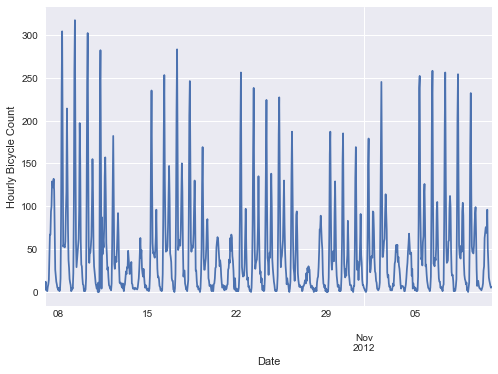

In [78]:
df_5w.plot()
plt.ylabel('Hourly Bicycle Count')

In [113]:
from pandas import DataFrame
from pandas import concat
def series_to_supervised(data, n_in = 1, n_out = 1, dropnan=True):
    """
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... , t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ...t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis = 1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace = True)
    return agg

In [131]:
df_5w.head()

Date
2012-10-07 00:00:00     6.0
2012-10-07 01:00:00    12.0
2012-10-07 02:00:00     2.0
2012-10-07 03:00:00     4.0
2012-10-07 04:00:00     1.0
Name: west, dtype: float64

In [126]:
print(df_5w.shape) # 840 : 24 * 7 * 5
list_val = list(df_5w.values)
df_fs = series_to_supervised(list_val,24,24) # arg: data, input, output
type(df_fs)
# 793 rows
# nrows - # of dimensions + 1
# 840 = (24 + 24) + 1 = 793


(840,)


In [ ]:
# Save outfile to csv
df_fs.to_csv("../input/5w_in24_out24.csv", index=False ) 